In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 100
rcParams['axes.grid'] = True
rcParams['font.size'] = 14
# rcParams

In [2]:
with open("opamp.csv") as f:
    data = pd.read_csv(f)

In [3]:
data

,f,u_out,u_a,A
0,50,2097.0,37.2,24369
1,100,2098.0,92.5,9805
2,200,2060.0,140.1,6356
3,500,1847.0,313.7,2545
4,1000,1420.0,483.0,1271
5,2000,877.0,594.0,638
6,5000,377.0,640.0,255
7,10000,189.0,640.0,128
8,20000,92.5,624.0,64
9,50000,32.6,546.0,26


[ 57.89207136 -29.40779755] [6.15186394]


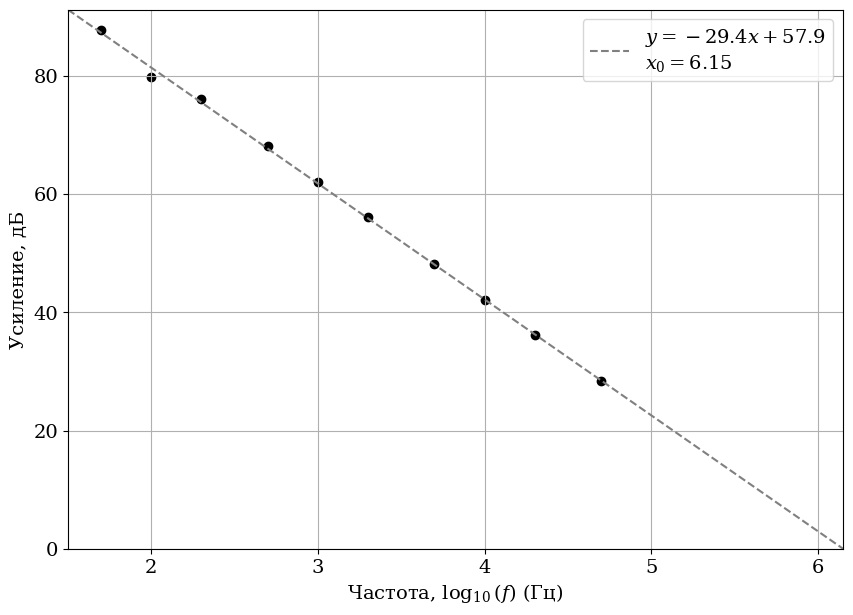

In [32]:
x, y = data.f, data.A
x = np.log10(data.f)
y = 20 * np.log10(data.A)
plt.scatter(x, y, color="black")
plt.xlabel("Частота, $\log_{10}(f)$ (Гц)")
plt.ylabel("Усиление, дБ")

from numpy.polynomial import Polynomial
approx = Polynomial.fit(x, y, 1)
x_range = np.linspace(1.5, 7, 10)
plt.plot(x_range, approx(x_range), ls="--", color="grey", label="$y = -29.4 x + 57.9$\n$x_0 = 6.15$")
print(approx.coef, approx.roots())

plt.xlim(1.5, approx.roots())
plt.ylim(0, approx(1.5))
plt.legend()
plt.savefig("opamp.pdf")